分析目标：分析KLOOK客路旅行《台北101观景台》的门票售卖数据，2016年到2019年，通过该活动侧面分析KLOOK旅行的经营状况和风险。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['font.sans-serif'] = ['SimHei']

# 一、初识数据

In [2]:
data = pd.read_csv(r'C:\Users\lihuiting\Desktop\数据分析案例应用\优惠券项目\kelu.csv')   #初始数据，加载数据，了解数据的基本情况
data.head()

,author,rating,time,year,amount,frequency
0,YOUNG,60,2019/2/28,2019,110,1
1,SHING YAN,100,2019/2/28,2019,110,1
2,Sha,60,2019/2/28,2019,110,1
3,Mary Mae,100,2019/2/28,2019,110,1
4,Maria Cristina,100,2019/2/28,2019,110,1


In [3]:
data.info()
#基本信息：门票价格：110，数据来源：2016~2019，8k+数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     8757 non-null   object
 1   rating     8757 non-null   int64 
 2   time       8757 non-null   object
 3   year       8757 non-null   int64 
 4   amount     8757 non-null   int64 
 5   frequency  8757 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 410.6+ KB


In [4]:
data.describe()
#有一半的用户评分达到了100，平均分92，1/2分位数已经达到了100
#消费金额：2016~2019年，门票的价格都是110
#消费频率：每一条用户记录都对应1次消费

,rating,year,amount,frequency
count,8757.000000,8757.000000,8757.0,8757.0
mean,92.417495,2017.760420,110.0,1.0
std,14.231179,0.686734,0.0,0.0
min,20.000000,2016.000000,110.0,1.0
25%,80.000000,2017.000000,110.0,1.0
50%,100.000000,2018.000000,110.0,1.0
75%,100.000000,2018.000000,110.0,1.0
max,100.000000,2019.000000,110.0,1.0


In [5]:
#数据格式转换
data['time'] = pd.to_datetime(data['time'],format = "%Y/%m/%d")
#data['time'] = pd.to_datetime(data['time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   author     8757 non-null   object        
 1   rating     8757 non-null   int64         
 2   time       8757 non-null   datetime64[ns]
 3   year       8757 non-null   int64         
 4   amount     8757 non-null   int64         
 5   frequency  8757 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 410.6+ KB


# 2.分析数据

a1.每天销量分析

In [6]:
#数据分组
df1 = data.groupby(data['time'])['frequency'].sum()
df1

time
2016-08-02     1
2016-08-03     1
2016-08-05     2
2016-08-06     1
2016-08-07     1
              ..
2019-02-24    21
2019-02-25    20
2019-02-26    17
2019-02-27    15
2019-02-28    15
Name: frequency, Length: 895, dtype: int64

<Axes: xlabel='time'>

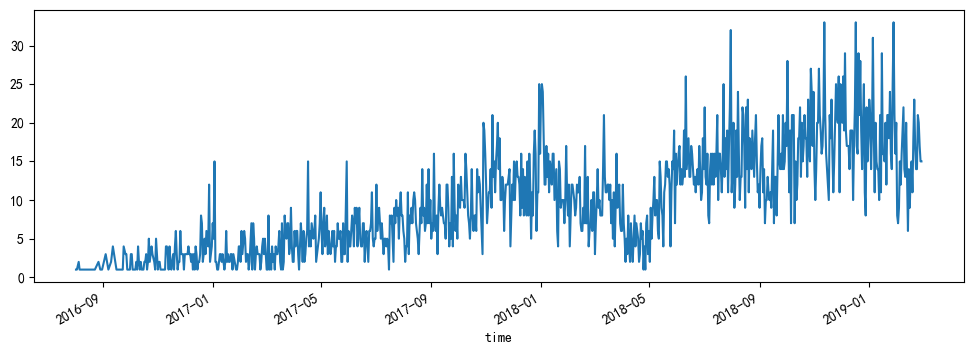

In [7]:
df1.plot(figsize=(12,4))
#整体来看，每日销量呈现上升趋势，在18年2，3，4月份出现一次较大的波动，销量急剧下滑。
#16年9日~17月1日，销量非常低，每天平均2，3张门票。

a2.每月销量分析

In [8]:
#取月份(分析每年的月份，不是整体的月份)所以不能用
data['month'] = data['time'].values.astype('datetime64[M]')
data.head()

,author,rating,time,year,amount,frequency,month
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01
2,Sha,60,2019-02-28,2019,110,1,2019-02-01
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01


In [9]:
df1 = data.groupby(data['month'])['rating'].count()
df1

month
2016-08-01     15
2016-09-01     29
2016-10-01     61
2016-11-01     64
2016-12-01    108
2017-01-01     84
2017-02-01     90
2017-03-01    116
2017-04-01    150
2017-05-01    165
2017-06-01    174
2017-07-01    205
2017-08-01    234
2017-09-01    242
2017-10-01    325
2017-11-01    365
2017-12-01    384
2018-01-01    411
2018-02-01    256
2018-03-01    311
2018-04-01    149
2018-05-01    319
2018-06-01    434
2018-07-01    481
2018-08-01    487
2018-09-01    402
2018-10-01    547
2018-11-01    557
2018-12-01    602
2019-01-01    580
2019-02-01    410
Name: rating, dtype: int64

Text(0.5, 1.0, '16~19年每月销量分析折线图')

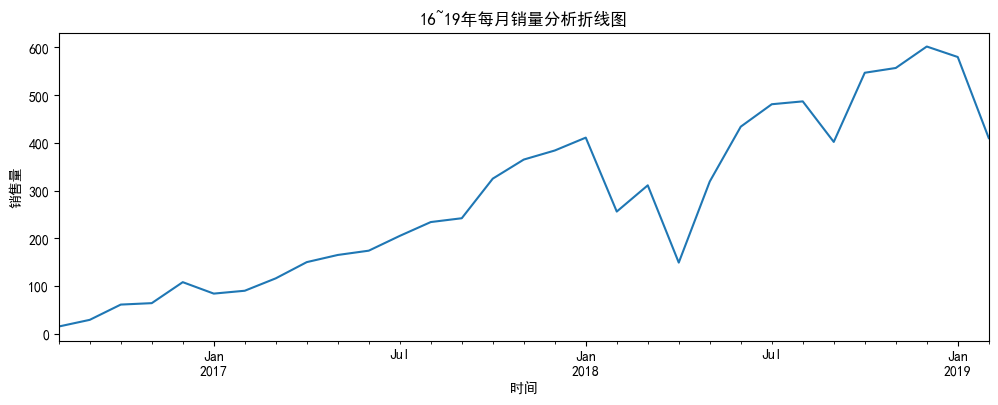

In [10]:
df1.plot(figsize=(12,4))
plt.xlabel('时间')
plt.ylabel('销售量')
plt.title('16~19年每月销量分析折线图')
#

a3.每个用户的购买量和消费金额分析

In [11]:
#按照顾客分组，统计每个用户的购买量
grouped_count_author = data.groupby(data['author'])['frequency'].sum().reset_index()
groupbe_sum_amount = data.groupby(data['author'])['amount'].sum().reset_index()

In [12]:
grouped_count_author.describe()

,frequency
count,7722.000000
mean,1.134033
std,0.623575
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,18.000000


In [13]:
groupbe_sum_amount.describe()

,amount
count,7722.000000
mean,124.743590
std,68.593227
min,110.000000
25%,110.000000
50%,110.000000
75%,110.000000
max,1980.000000


Text(0, 0.5, '消费金额')

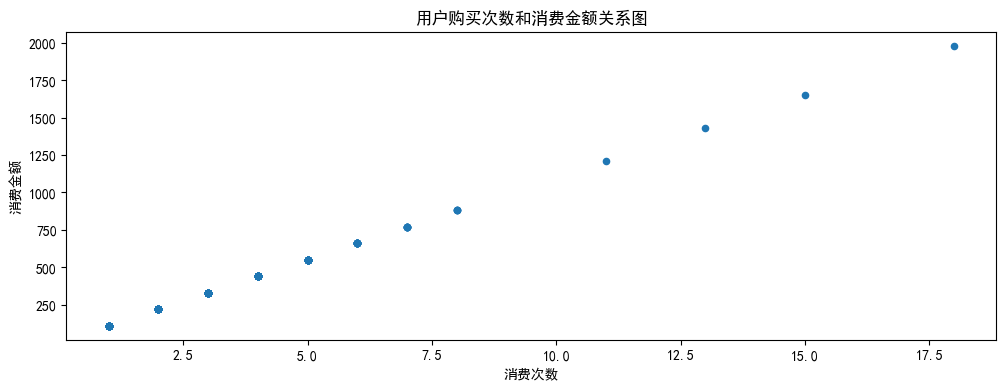

In [14]:
user_purchase_relation = pd.merge(left = grouped_count_author,right = groupbe_sum_amount,on='author',how='inner')
user_purchase_relation.tail(60)
user_purchase_relation.plot.scatter(x='frequency',y='amount',figsize = (12,4))
plt.title('用户购买次数和消费金额关系图')
plt.xlabel('消费次数')
plt.ylabel('消费金额')
#斜率就是门票价格。

b1.用户购买门票数量分析

Text(0.5, 1.0, '用户购买门票数量直方图')

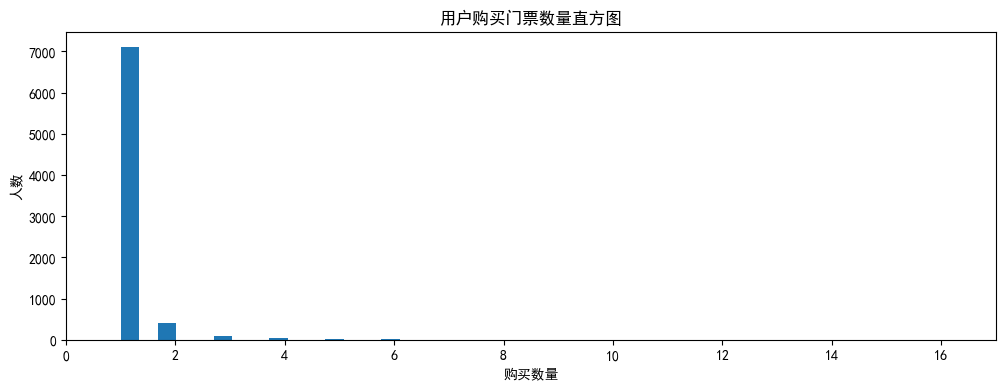

In [15]:
data.groupby('author')['frequency'].count().plot.hist(bins=50,figsize=(12,4))
plt.xlim(0,17)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('用户购买门票数量直方图')
#绝大多数用户购买1张门票
#少数人购买2~4张门票。

b2.用户购买门票2次及以上情况分析。

Text(0.5, 1.0, '购买门票在2次及以上的用户数量')

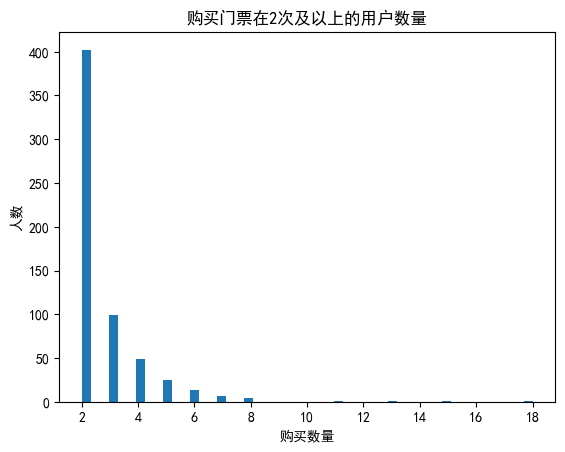

In [16]:
df_fre_2 = data.groupby('author').count().reset_index()
#df_fre_2.head()
df_fre_2[df_fre_2['frequency']>=2].groupby('author')['frequency'].sum().plot.hist(bins=50)
plt.xlabel('购买数量')
plt.ylabel('人数')
plt.title('购买门票在2次及以上的用户数量')

b3.查看购买2次以上具体人数

In [17]:
df_fre_2[df_fre_2['frequency']>=2].groupby('frequency')['author'].count()

frequency
2     402
3      99
4      49
5      25
6      13
7       7
8       4
11      1
13      1
15      1
18      1
Name: author, dtype: int64

b4.购买次数在1~5次之间用户占比分析

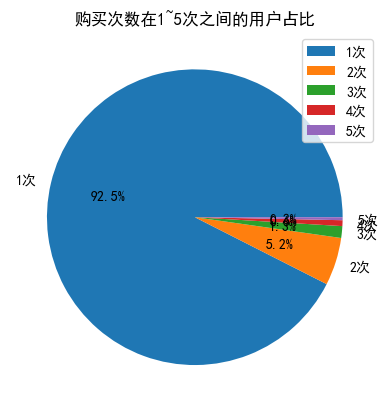

In [18]:
df_frequency_gta_1 = data.groupby('author')['frequency'].count().reset_index()
df_frequency_gta_1.head()
f3 = df_frequency_gta_1[(df_frequency_gta_1['frequency']>=1)&(df_frequency_gta_1['frequency']<=5)]
f3 = f3.groupby('frequency')['author'].count()
labels = ['1次','2次','3次','4次','5次']
plt.pie(f3,labels=labels,autopct='%1.1f%%')
plt.title('购买次数在1~5次之间的用户占比')
plt.legend()

b5.购买次数在2~5之间的用户占比分析

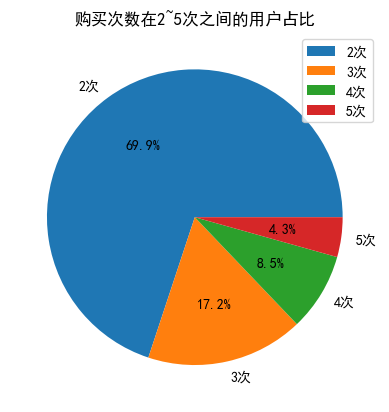

In [19]:
df_frequency_gta_1 = data.groupby('author')['frequency'].count().reset_index()
df_frequency_gta_1.head()
f2 = df_frequency_gta_1[(df_frequency_gta_1['frequency']>=2)&(df_frequency_gta_1['frequency']<=5)]
f2 = f2.groupby('frequency')['author'].count()
labels = ['2次','3次','4次','5次']
plt.pie(f2,labels=labels,autopct='%1.1f%%')
plt.title('购买次数在2~5次之间的用户占比')
plt.legend()
#在购物次数2~5次的用户中，其中消费2次的占比70%。
#消费4，5次的用户比重少，可以针对性对2，3次的用户进行引导
#

c1.复购率分析

In [20]:
#一个时间窗口内消费次数在2次以上的用户在总消费用户的占比
data.head()

,author,rating,time,year,amount,frequency,month
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01
2,Sha,60,2019-02-28,2019,110,1,2019-02-01
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01


In [21]:
#df2_time_sc = data.groupby(['author','month'])['frequency'].sum().unstack()
#df2_time_sc
df2_time_sc = data.pivot_table(columns = 'month',index = 'author',values = 'frequency',aggfunc='count')
df2_time_sc = df2_time_sc.fillna(0)
df2_time_sc
def change_num(x):
    if x>1:
        return 1
    elif x == 1:
        return 0
    else:
        return np.NAN
#applymap:处理df数据，处理每一个元素
#apply:处理df数据，处理一列或一行元素
#map:处理Series数据
df2_time_sc1 = df2_time_sc.applymap(lambda x:1 if x>1 else np.NAN if x==0 else 0)
df2_time_sc1.head()

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18312\3355495135.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2_time_sc1 = df2_time_sc.applymap(lambda x:1 if x>1 else np.NAN if x==0 else 0)


month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hui Shan,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df2_time_sc1[df2_time_sc1['2016-09-01']==1]

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
Chan,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YINGJIE,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
(df2_time_sc1.sum(axis=0)/df2_time_sc1.count(axis=0)).idxmax()

Timestamp('2016-09-01 00:00:00')

Text(0.5, 1.0, '16~19年每月用户复购率')

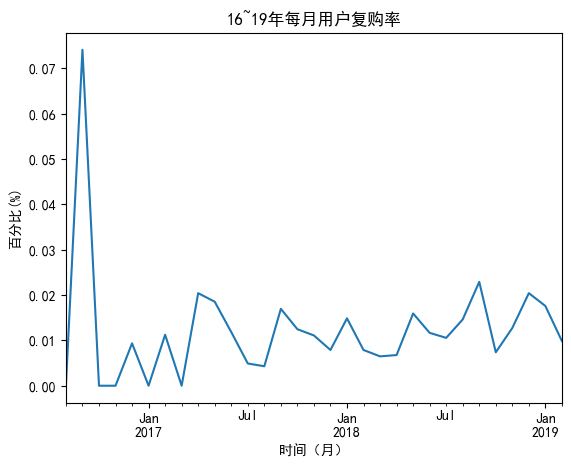

In [24]:
(df2_time_sc1.sum(axis=0)/df2_time_sc1.count(axis=0)).plot()
plt.xlabel('时间（月）')
plt.ylabel('百分比(%)')
plt.title('16~19年每月用户复购率')

c2.复购人数

In [25]:
df2_time_sc1.head()

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hui Shan,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df2_time_sc.sum()  #复购人数

month
2016-08-01     15.0
2016-09-01     29.0
2016-10-01     61.0
2016-11-01     64.0
2016-12-01    108.0
2017-01-01     84.0
2017-02-01     90.0
2017-03-01    116.0
2017-04-01    150.0
2017-05-01    165.0
2017-06-01    174.0
2017-07-01    205.0
2017-08-01    234.0
2017-09-01    242.0
2017-10-01    325.0
2017-11-01    365.0
2017-12-01    384.0
2018-01-01    411.0
2018-02-01    256.0
2018-03-01    311.0
2018-04-01    149.0
2018-05-01    319.0
2018-06-01    434.0
2018-07-01    481.0
2018-08-01    487.0
2018-09-01    402.0
2018-10-01    547.0
2018-11-01    557.0
2018-12-01    602.0
2019-01-01    580.0
2019-02-01    410.0
dtype: float64

Text(0.5, 1.0, '16~19年每月的复购人数折线图')

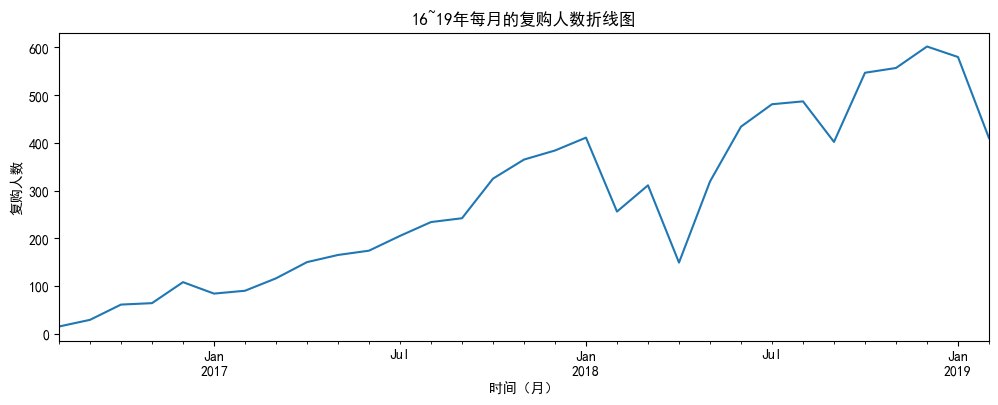

In [27]:
df2_time_sc.sum().plot(figsize=(12,4))
plt.xlabel('时间（月）')
plt.ylabel('复购人数')
plt.title('16~19年每月的复购人数折线图')
#整体趋势上，复购率上升
#在18年2，3，4，10月和19年五月下降非常明显

c3.回购率分析

In [28]:
#回购率：在一个时间窗口内，消费的用户，在下一个时间窗口内仍然消费
df2_time_sc.head()
def huigou(x):
    zt = []
    for i in range(30):
        if x[i] >= 1:
            if x[i+1] >= 1:
                zt.append(1)
            else:
                zt.append(0)
        else:
            zt.append(np.NAN)
    zt.append(np.NAN)
    return pd.Series(zt,df2_time_sc.columns)
df3_time_sc = df2_time_sc.apply(huigou,axis=1)
df3_time_sc

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18312\689647005.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i] >= 1:
C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18312\689647005.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i+1] >= 1:


month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hui Shan,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
華山,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
蘇,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c4.回购人数占比分析

In [29]:
df3_time_sc.sum()

month
2016-08-01     0.0
2016-09-01     0.0
2016-10-01     0.0
2016-11-01     0.0
2016-12-01     2.0
2017-01-01     1.0
2017-02-01     1.0
2017-03-01     2.0
2017-04-01     2.0
2017-05-01     3.0
2017-06-01     1.0
2017-07-01     3.0
2017-08-01     2.0
2017-09-01     4.0
2017-10-01     4.0
2017-11-01     6.0
2017-12-01     4.0
2018-01-01     2.0
2018-02-01     5.0
2018-03-01     4.0
2018-04-01     2.0
2018-05-01    13.0
2018-06-01    14.0
2018-07-01    11.0
2018-08-01    11.0
2018-09-01    11.0
2018-10-01    14.0
2018-11-01    20.0
2018-12-01    11.0
2019-01-01     9.0
2019-02-01     0.0
dtype: float64

In [30]:
df3_time_sc.count()

month
2016-08-01     15
2016-09-01     27
2016-10-01     61
2016-11-01     64
2016-12-01    107
2017-01-01     84
2017-02-01     89
2017-03-01    116
2017-04-01    147
2017-05-01    162
2017-06-01    169
2017-07-01    204
2017-08-01    233
2017-09-01    236
2017-10-01    321
2017-11-01    361
2017-12-01    381
2018-01-01    404
2018-02-01    254
2018-03-01    309
2018-04-01    148
2018-05-01    314
2018-06-01    429
2018-07-01    474
2018-08-01    479
2018-09-01    393
2018-10-01    543
2018-11-01    550
2018-12-01    588
2019-01-01    569
2019-02-01      0
dtype: int64

Text(0, 0.5, '回购率%')

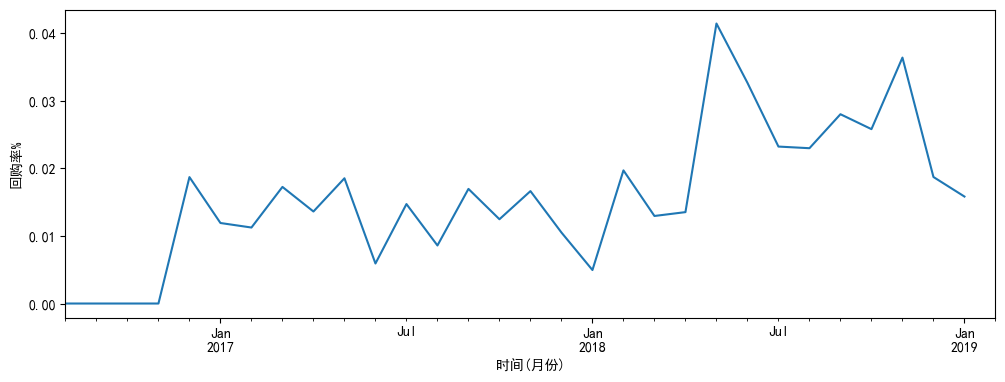

In [31]:
(df3_time_sc.sum()/df3_time_sc.count()).plot(figsize=(12,4))
plt.xlabel('时间(月份)')
plt.ylabel('回购率%')
#回购率最高在18年6月份，达到4%
#整体来看，回购率呈现微弱上升趋势
#出现了几次较大下滑，分别是17年6月份，18年8月份'

Text(0, 0.5, '回购人数%')

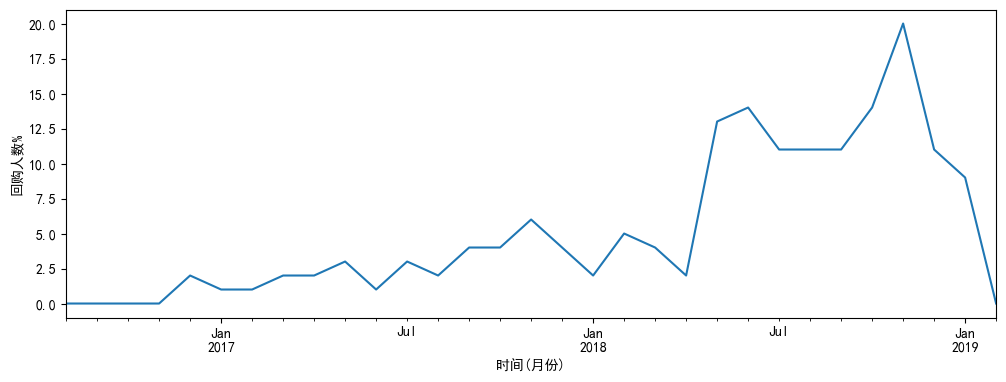

In [32]:
df3_time_sc.sum().plot(figsize=(12,4))
plt.xlabel('时间(月份)')
plt.ylabel('回购人数%')
#整体呈现上升趋势，回购人数最多时在18年11月份
#其中有几次较为明显的下降，分别是17年6月份，18年1月份，18年8月份，19年1月份

c5.每个月分层用户占比情况

In [33]:
df2_time_sc.head()
def fencheng(x):
    xt = []
    for i in range(31):
        if x[i] == 0:
            if len(xt) == 0:
                xt.append('unreg')
            else:
                if xt[i-1] == 'unreg':
                    xt.append('unreg')
                else:
                    xt.append('unactive')
        else:
            if len(xt)==0:
                xt.append('new')
            elif xt[i-1] == 'unreg':
                xt.append('new')
            elif xt[i-1] == 'active':
                xt.append('return')
            else:
                xt.append('active')
    return pd.Series(xt,df2_time_sc.columns)
df3_time_sc = df2_time_sc.apply(fencheng,axis=1)
df3_time_sc
                

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18312\1358974958.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i] == 0:


month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive
Goh Yu Wen Eunice,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Hui Shan,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Huihui,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
KO-CHENG,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
華山,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
蘇,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [34]:
df4_time_sc = df3_time_sc.replace('unreg',np.NAN)
df4_time_sc

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
author,,,,,,,,,,,,,,,,,,,,,
wenbiao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,unactive,unactive
Goh Yu Wen Eunice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Hui Shan,NaN,NaN,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
Huihui,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
KO-CHENG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
芊羽,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
華山,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
蘇,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [35]:
df4_time_sc.count()

month
2016-08-01      15
2016-09-01      42
2016-10-01     103
2016-11-01     166
2016-12-01     272
2017-01-01     353
2017-02-01     438
2017-03-01     550
2017-04-01     692
2017-05-01     848
2017-06-01    1011
2017-07-01    1208
2017-08-01    1430
2017-09-01    1654
2017-10-01    1954
2017-11-01    2288
2017-12-01    2644
2018-01-01    3016
2018-02-01    3244
2018-03-01    3520
2018-04-01    3647
2018-05-01    3913
2018-06-01    4295
2018-07-01    4702
2018-08-01    5122
2018-09-01    5452
2018-10-01    5916
2018-11-01    6377
2018-12-01    6880
2019-01-01    7370
2019-02-01    7722
dtype: int64

In [36]:
df5_time_sc = df4_time_sc.apply(pd.value_counts).T
df5_time_sc

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18312\2072733740.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df5_time_sc = df4_time_sc.apply(pd.value_counts).T
C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18312\2072733740.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df5_time_sc = df4_time_sc.apply(pd.value_counts).T
C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18312\2072733740.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df5_time_sc = df4_time_sc.apply(pd.value_counts).T
C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18312\2072733740.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df5_time_sc = df4_time_

,active,new,return,unactive
month,,,,
2016-08-01,NaN,15.0,NaN,NaN
2016-09-01,NaN,27.0,NaN,15.0
2016-10-01,NaN,61.0,NaN,42.0
2016-11-01,1.0,63.0,NaN,102.0
2016-12-01,1.0,106.0,NaN,165.0
2017-01-01,3.0,81.0,NaN,269.0
2017-02-01,4.0,85.0,NaN,349.0
2017-03-01,3.0,112.0,1.0,434.0
2017-04-01,5.0,142.0,NaN,545.0


<Axes: xlabel='month'>

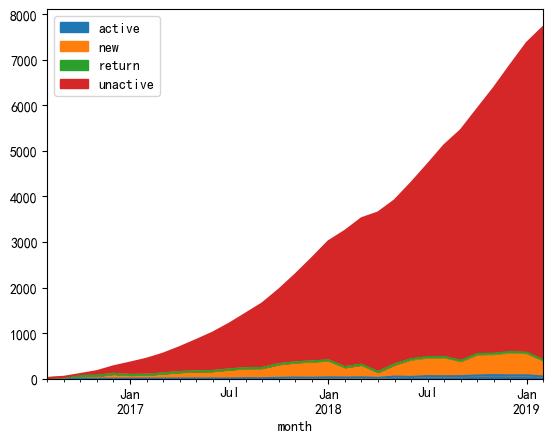

In [37]:
df5_time_sc.plot.area()
#不活跃用户占据网站用户的主体
#橙色是新用户，从17年1月到19年1月呈上升趋势
#18年4月左右，新用户急剧下滑


c6.活跃用户分析

In [38]:
df6 = df5_time_sc.T.fillna(0)
df6

month,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,...,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01
active,0.0,0.0,0.0,1.0,1.0,3.0,4.0,3.0,5.0,6.0,...,47.0,39.0,57.0,54.0,57.0,71.0,80.0,73.0,75.0,48.0
new,15.0,27.0,61.0,63.0,106.0,81.0,85.0,112.0,142.0,156.0,...,266.0,382.0,407.0,420.0,330.0,464.0,461.0,503.0,490.0,352.0
return,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,8.0,10.0,5.0,6.0,8.0,9.0,12.0,4.0,6.0
unactive,0.0,15.0,42.0,102.0,165.0,269.0,349.0,434.0,545.0,686.0,...,3599.0,3866.0,4228.0,4643.0,5059.0,5373.0,5827.0,6292.0,6801.0,7316.0


<Axes: xlabel='month'>

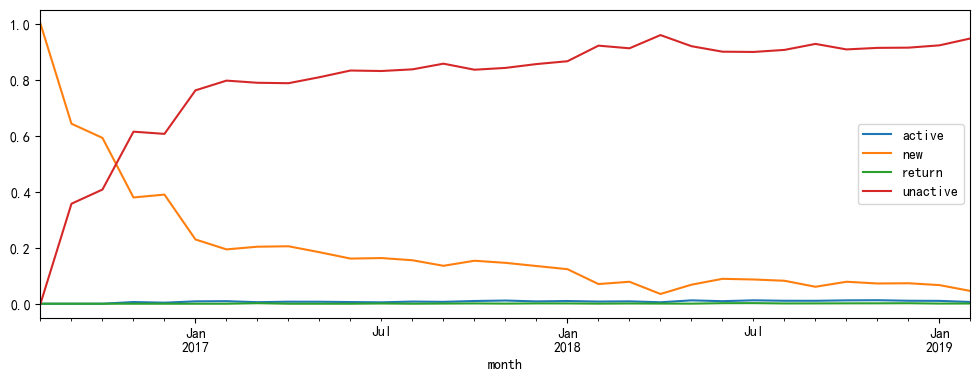

In [39]:
  #每月用户总量
return_rate = df6/df6.sum()
return_rate.T.plot(figsize = (12,4))
#在17年1月份过后，网站用户主体由不活跃用户组成，新用户占比开始逐步下降，并趋于稳定，稳定在10%左右
#活跃用户一直占比较小。

c7.每月活跃用户占比

In [40]:
return_ratet = return_rate.T
return_ratet

,active,new,return,unactive
month,,,,
2016-08-01,0.000000,1.000000,0.000000,0.000000
2016-09-01,0.000000,0.642857,0.000000,0.357143
2016-10-01,0.000000,0.592233,0.000000,0.407767
2016-11-01,0.006024,0.379518,0.000000,0.614458
2016-12-01,0.003676,0.389706,0.000000,0.606618
2017-01-01,0.008499,0.229462,0.000000,0.762040
2017-02-01,0.009132,0.194064,0.000000,0.796804
2017-03-01,0.005455,0.203636,0.001818,0.789091
2017-04-01,0.007225,0.205202,0.000000,0.787572


Text(0.5, 1.0, '每个月活跃用户占比')

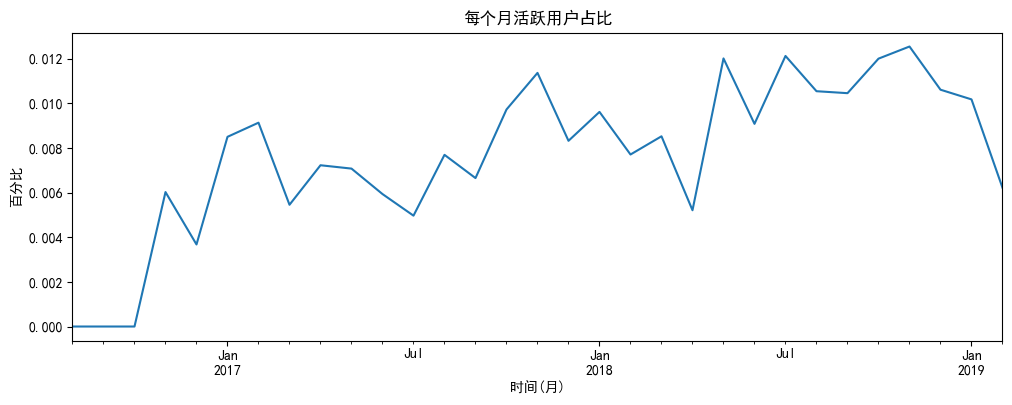

In [41]:
return_ratet['active'].plot(figsize=(12,4))
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.title('每个月活跃用户占比')
#春节前后，活跃用户大幅下降
#结合历年1~2月份销量来看，都会出现一定比例的下降，再次验证：春节的影响
#在18年2月和5月出现异常。

c8.每月回流用户占比

Text(0.5, 1.0, '每个月回流用户占比')

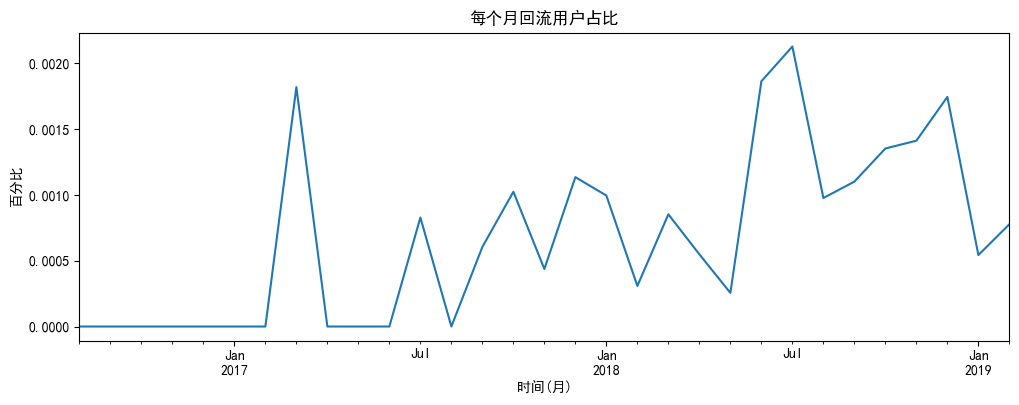

In [42]:
return_ratet['return'].plot(figsize=(12,4))
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.title('每个月回流用户占比')

In [43]:
return_rate.T['return'].mean() 

0.0006676973724422908

c9.用户生命周期分析

#计算方式：每一个用户最后一个购买商品的时间-用户第一次购买商品的时间，转换为天数，即为生命周期

In [44]:
time_min = data.groupby('author')['time'].min()
time_max = data.groupby('author')['time'].max()

In [45]:
time_min

author
      wenbiao        2018-12-31
 Goh Yu Wen Eunice   2017-11-26
 Hui Shan            2016-12-07
 Huihui              2017-09-28
 KO-CHENG            2018-07-16
                        ...    
芊羽                   2018-03-11
華山                   2017-08-14
蘇                    2017-12-10
郁君                   2017-12-25
青慧                   2018-02-28
Name: time, Length: 7722, dtype: datetime64[ns]

In [46]:
time_max

author
      wenbiao        2018-12-31
 Goh Yu Wen Eunice   2017-11-26
 Hui Shan            2016-12-07
 Huihui              2017-09-28
 KO-CHENG            2018-07-16
                        ...    
芊羽                   2018-03-11
華山                   2017-08-14
蘇                    2017-12-10
郁君                   2017-12-25
青慧                   2018-02-28
Name: time, Length: 7722, dtype: datetime64[ns]

In [47]:
time_max

author
      wenbiao        2018-12-31
 Goh Yu Wen Eunice   2017-11-26
 Hui Shan            2016-12-07
 Huihui              2017-09-28
 KO-CHENG            2018-07-16
                        ...    
芊羽                   2018-03-11
華山                   2017-08-14
蘇                    2017-12-10
郁君                   2017-12-25
青慧                   2018-02-28
Name: time, Length: 7722, dtype: datetime64[ns]

In [48]:
time_gap = time_max-time_min
time_gap

author
      wenbiao        0 days
 Goh Yu Wen Eunice   0 days
 Hui Shan            0 days
 Huihui              0 days
 KO-CHENG            0 days
                      ...  
芊羽                   0 days
華山                   0 days
蘇                    0 days
郁君                   0 days
青慧                   0 days
Name: time, Length: 7722, dtype: timedelta64[ns]

In [49]:
time_gap1 = time_gap.value_counts()
time_gap1

time
0 days      7130
372 days       5
275 days       5
104 days       5
142 days       4
            ... 
493 days       1
509 days       1
575 days       1
133 days       1
127 days       1
Name: count, Length: 391, dtype: int64

In [50]:
time_gap.describe()
#少数人成为了网站的中流砥柱
#平均生命周期23天
#通过25%，50%，75%分位数可知，绝大多数用户生命周期为0天

count                          7722
mean     23 days 01:45:32.867132867
std      98 days 16:47:46.849668504
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 0 days 00:00:00
max               864 days 00:00:00
Name: time, dtype: object

d.用户留存率

In [51]:
#用户每一次的消费时间分别减去用户第一次消费时间，即为留存
time_min = time_min.reset_index()
time_min

,author,time
0,wenbiao,2018-12-31
1,Goh Yu Wen Eunice,2017-11-26
2,Hui Shan,2016-12-07
3,Huihui,2017-09-28
4,KO-CHENG,2018-07-16
...,...,...
7717,芊羽,2018-03-11
7718,華山,2017-08-14
7719,蘇,2017-12-10
7720,郁君,2017-12-25


In [52]:
data = pd.merge(left=data,right=time_min,how = 'inner',on='author',suffixes=('','_min'))
data

,author,rating,time,year,amount,frequency,month,time_min
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28
2,Sha,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01,2017-06-27
...,...,...,...,...,...,...,...,...
8752,CHI NANG,100,2016-08-07,2016,110,1,2016-08-01,2016-08-07
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01,2016-08-03


In [53]:
data['keep'] = data['time']-data['time_min']
data

,author,rating,time,year,amount,frequency,month,time_min,keep
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0 days
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0 days
2,Sha,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0 days
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0 days
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01,2017-06-27,611 days
...,...,...,...,...,...,...,...,...,...
8752,CHI NANG,100,2016-08-07,2016,110,1,2016-08-01,2016-08-07,0 days
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0 days
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0 days
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01,2016-08-03,0 days


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8757 entries, 0 to 8756
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   author     8757 non-null   object         
 1   rating     8757 non-null   int64          
 2   time       8757 non-null   datetime64[ns] 
 3   year       8757 non-null   int64          
 4   amount     8757 non-null   int64          
 5   frequency  8757 non-null   int64          
 6   month      8757 non-null   datetime64[s]  
 7   time_min   8757 non-null   datetime64[ns] 
 8   keep       8757 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), datetime64[s](1), int64(4), object(1), timedelta64[ns](1)
memory usage: 615.9+ KB


In [56]:
data['keep'] = data['keep'].apply(lambda x:x/np.timedelta64(1,'D'))
data

,author,rating,time,year,amount,frequency,month,time_min,keep
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0
2,Sha,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01,2017-06-27,611.0
...,...,...,...,...,...,...,...,...,...
8752,CHI NANG,100,2016-08-07,2016,110,1,2016-08-01,2016-08-07,0.0
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0.0
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0.0
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01,2016-08-03,0.0


In [57]:
bin = [i*90 for i in range(11)]
data['time_diff'] = pd.cut(data['keep'],bin)
data

,author,rating,time,year,amount,frequency,month,time_min,keep,time_diff
0,YOUNG,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
1,SHING YAN,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
2,Sha,60,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
3,Mary Mae,100,2019-02-28,2019,110,1,2019-02-01,2019-02-28,0.0,NaN
4,Maria Cristina,100,2019-02-28,2019,110,1,2019-02-01,2017-06-27,611.0,"(540.0, 630.0]"
...,...,...,...,...,...,...,...,...,...,...
8752,CHI NANG,100,2016-08-07,2016,110,1,2016-08-01,2016-08-07,0.0,NaN
8753,Oliver Stephen Ah Kam,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0.0,NaN
8754,Halley,100,2016-08-05,2016,110,1,2016-08-01,2016-08-05,0.0,NaN
8755,ANDREW WEIQIANG,100,2016-08-03,2016,110,1,2016-08-01,2016-08-03,0.0,NaN


In [62]:
df4 = data.groupby(['author','time_diff'])['frequency'].count().unstack()
df4

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18312\201188932.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4 = data.groupby(['author','time_diff'])['frequency'].count().unstack()


time_diff,"(0, 90]","(90, 180]","(180, 270]","(270, 360]","(360, 450]","(450, 540]","(540, 630]","(630, 720]","(720, 810]","(810, 900]"
author,,,,,,,,,,
wenbiao,0,0,0,0,0,0,0,0,0,0
Goh Yu Wen Eunice,0,0,0,0,0,0,0,0,0,0
Hui Shan,0,0,0,0,0,0,0,0,0,0
Huihui,0,0,0,0,0,0,0,0,0,0
KO-CHENG,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
芊羽,0,0,0,0,0,0,0,0,0,0
華山,0,0,0,0,0,0,0,0,0,0
蘇,0,0,0,0,0,0,0,0,0,0


In [66]:
df6 = df4.applymap(lambda x:1 if x>0 else 0)
df6.head(60)

C:\Users\lihuiting\AppData\Local\Temp\ipykernel_18312\2440346391.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df6 = df4.applymap(lambda x:1 if x>0 else 0)


time_diff,"(0, 90]","(90, 180]","(180, 270]","(270, 360]","(360, 450]","(450, 540]","(540, 630]","(630, 720]","(720, 810]","(810, 900]"
author,,,,,,,,,,
wenbiao,0,0,0,0,0,0,0,0,0,0
Goh Yu Wen Eunice,0,0,0,0,0,0,0,0,0,0
Hui Shan,0,0,0,0,0,0,0,0,0,0
Huihui,0,0,0,0,0,0,0,0,0,0
KO-CHENG,0,0,0,0,0,0,0,0,0,0
TING SHAN,0,0,0,0,0,0,0,0,0,0
A,0,0,0,0,0,0,0,0,0,0
A RAM,0,0,0,0,0,0,0,0,0,0
ABIGAIL BEATRICE,0,0,0,0,0,0,0,0,0,0


In [67]:
df6.sum()

time_diff
(0, 90]       175
(90, 180]     153
(180, 270]    124
(270, 360]    115
(360, 450]    111
(450, 540]     76
(540, 630]     59
(630, 720]     38
(720, 810]     21
(810, 900]      3
dtype: int64

In [68]:
df6.count()

time_diff
(0, 90]       7722
(90, 180]     7722
(180, 270]    7722
(270, 360]    7722
(360, 450]    7722
(450, 540]    7722
(540, 630]    7722
(630, 720]    7722
(720, 810]    7722
(810, 900]    7722
dtype: int64

Text(0.5, 1.0, '各时间段用户留存率')

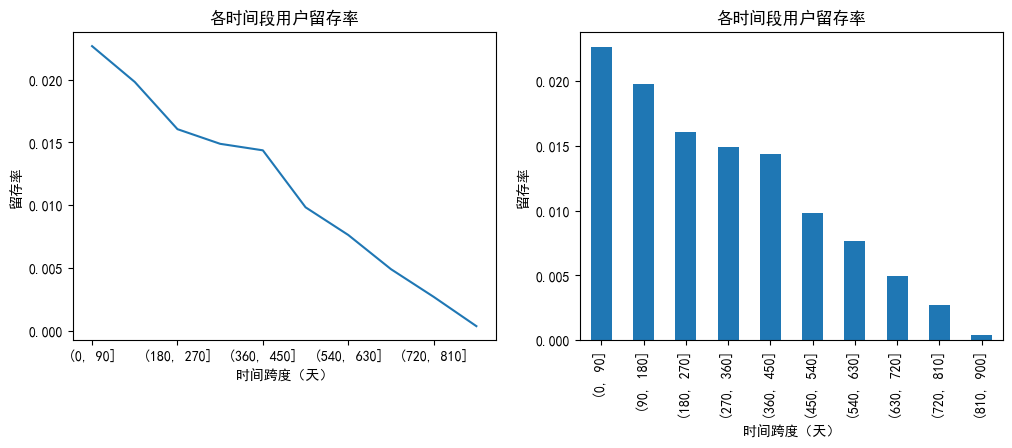

In [74]:
df_rate = df6.sum()/df6.count()
plt.subplot(1,2,1)
df_rate.plot(figsize=(12,4))
plt.xlabel('时间跨度（天）')
plt.ylabel('留存率')
plt.title('各时间段用户留存率')
plt.subplot(1,2,2)
df_rate.plot.bar(figsize=(12,4))
plt.xlabel('时间跨度（天）')
plt.ylabel('留存率')
plt.title('各时间段用户留存率')

In [ ]:
#如图，每个周期是3个月，第一个周期的留存率是2.2%，前三个周期的递减速度在0.3%左右。
#在第四五周期的时候趋于平稳，稳定在1.5%左右
#从第五个周期开始，留存率明显下降，下降到几乎0%，需要采用方法将用户再次消费
#如果在跨度为1年的时候不召回用户，则面临大量用户流失的风险。